In [1]:
import requests
import datetime
import numpy as np 
import pandas as pd

In [2]:
fechas = pd.date_range(start='01/01/2020', end='31/12/2020', freq='W').astype(str)
rango = fechas.tolist()

df = pd.DataFrame(columns=['value', 'percentage', 'datetime'])

for rango_inferior, rango_superior in zip(rango[1::], rango[1::2]):
    print(rango_inferior, rango_superior)

2020-01-12 2020-01-12
2020-01-19 2020-01-26
2020-01-26 2020-02-09
2020-02-02 2020-02-23
2020-02-09 2020-03-08
2020-02-16 2020-03-22
2020-02-23 2020-04-05
2020-03-01 2020-04-19
2020-03-08 2020-05-03
2020-03-15 2020-05-17
2020-03-22 2020-05-31
2020-03-29 2020-06-14
2020-04-05 2020-06-28
2020-04-12 2020-07-12
2020-04-19 2020-07-26
2020-04-26 2020-08-09
2020-05-03 2020-08-23
2020-05-10 2020-09-06
2020-05-17 2020-09-20
2020-05-24 2020-10-04
2020-05-31 2020-10-18
2020-06-07 2020-11-01
2020-06-14 2020-11-15
2020-06-21 2020-11-29
2020-06-28 2020-12-13
2020-07-05 2020-12-27


In [ ]:
"""test_payload2 = {
    'start_date' : '2020-08-25T17:00',
    'end_date' : datetime.datetime.now().replace(microsecond=0, second=0).isoformat(),
    'time_trunc' : 'day', 
}

r = requests.get(f"{base_url}balance/balance-electrico", params=test_payload2)
"""

In [3]:
import requests
import datetime
import numpy as np 
import pandas as pd

base_url = 'https://apidatos.ree.es/es/datos/'
fechas = pd.date_range(start='01/01/2016', end='01/01/2020', freq='W').astype(str)
rango = fechas.tolist()

df = pd.DataFrame(columns=['value', 'percentage', 'datetime'])

for rango_inferior, rango_superior in zip(rango, rango[1:]):
    print(rango_inferior, rango_superior)

    test_payload_hour = {
        'start_date' : f'{rango_inferior}T00:00',
        'end_date' : f'{rango_superior}T00:00',
        'time_trunc' : 'hour', 
    }

    req = requests.get(f"{base_url}demanda/demanda-tiempo-real",                                                params=test_payload_hour)

    values = req.json()['included'][0]['attributes']['values']

    value_s = [demand['value'] for demand in values]
    percentage = [demand['percentage'] for demand in values]
    datetime = [demand['datetime'] for demand in values]

    df = pd.concat([df, pd.DataFrame({'value' : value_s, 'percentage' : percentage, 'datetime' : datetime})]).drop_duplicates().reset_index(drop=True)


print(df)






2016-01-03 2016-01-10
2016-01-10 2016-01-17
2016-01-17 2016-01-24
2016-01-24 2016-01-31
2016-01-31 2016-02-07
2016-02-07 2016-02-14
2016-02-14 2016-02-21
2016-02-21 2016-02-28
2016-02-28 2016-03-06
2016-03-06 2016-03-13
2016-03-13 2016-03-20
2016-03-20 2016-03-27
2016-03-27 2016-04-03
2016-04-03 2016-04-10
2016-04-10 2016-04-17
2016-04-17 2016-04-24
2016-04-24 2016-05-01
2016-05-01 2016-05-08
2016-05-08 2016-05-15
2016-05-15 2016-05-22
2016-05-22 2016-05-29
2016-05-29 2016-06-05
2016-06-05 2016-06-12
2016-06-12 2016-06-19
2016-06-19 2016-06-26
2016-06-26 2016-07-03
2016-07-03 2016-07-10
2016-07-10 2016-07-17
2016-07-17 2016-07-24
2016-07-24 2016-07-31
2016-07-31 2016-08-07
2016-08-07 2016-08-14
2016-08-14 2016-08-21
2016-08-21 2016-08-28
2016-08-28 2016-09-04
2016-09-04 2016-09-11
2016-09-11 2016-09-18
2016-09-18 2016-09-25
2016-09-25 2016-10-02
2016-10-02 2016-10-09
2016-10-09 2016-10-16
2016-10-16 2016-10-23
2016-10-23 2016-10-30
2016-10-30 2016-11-06
2016-11-06 2016-11-13
2016-11-13

In [4]:
df = df.set_index('datetime')


In [5]:
df.to_csv('REE_2016_2020_raw.csv', index=True)

In [8]:
df = pd.read_csv('REE_2016_2020_raw.csv')

In [9]:
df

,datetime,value,percentage
0,2016-01-03T00:00:00.000+01:00,24998,0.334856
1,2016-01-03T00:10:00.000+01:00,24901,0.335874
2,2016-01-03T00:20:00.000+01:00,24403,0.333210
3,2016-01-03T00:30:00.000+01:00,23966,0.330976
4,2016-01-03T00:40:00.000+01:00,23533,0.328664
...,...,...,...
209660,2019-12-28T23:20:00.000+01:00,26018,0.332622
209661,2019-12-28T23:30:00.000+01:00,25754,0.331886
209662,2019-12-28T23:40:00.000+01:00,25556,0.331896
209663,2019-12-28T23:50:00.000+01:00,25263,0.331266


In [10]:
df['Date'] = pd.to_datetime(df['datetime'])
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.strftime('%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
df.index.freq = '10T'
df = df['value']
df = df.resample("H").mean().round(0).astype(np.int32)

In [14]:
df['2016']

Date
2016-01-02 23:00:00    24151
2016-01-03 00:00:00    22170
2016-01-03 01:00:00    20691
2016-01-03 02:00:00    19737
2016-01-03 03:00:00    19437
                       ...  
2016-12-31 19:00:00    30858
2016-12-31 20:00:00    29278
2016-12-31 21:00:00    26846
2016-12-31 22:00:00    25560
2016-12-31 23:00:00    24472
Freq: H, Name: value, Length: 8737, dtype: int32

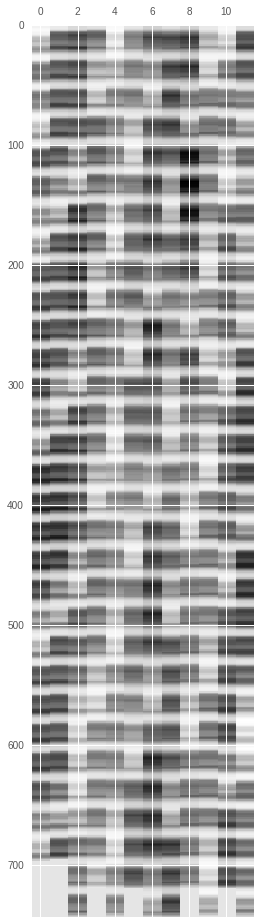

In [15]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from pandas import concat

one_year = df['2016']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

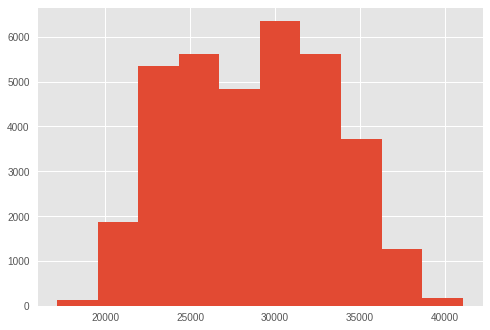

In [23]:
df.hist()


In [37]:
df.to_csv("REE_2016_2020_gluonTS.csv")

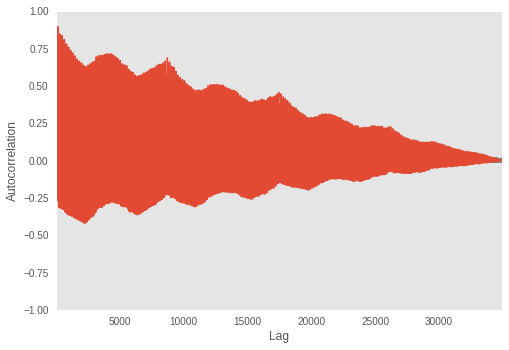

In [21]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)


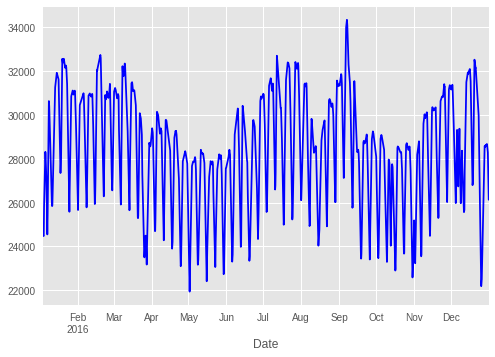

In [34]:
rolling = df['2016'].rolling(window=24)
rolling_mean = rolling.mean()
rolling_mean.plot(color='blue')


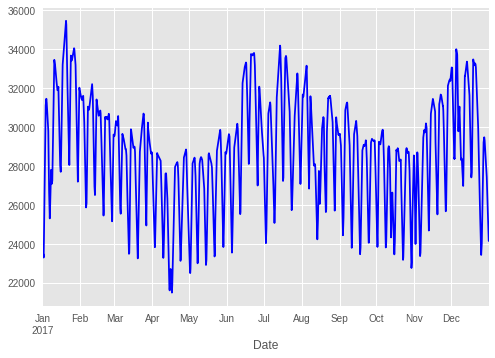

In [35]:
rolling = df['2017'].rolling(window=24)
rolling_mean = rolling.mean()
rolling_mean.plot(color='blue')

KeyError: 'values'

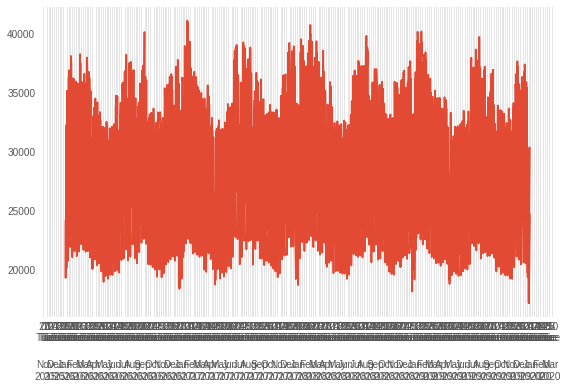

In [22]:
import matplotlib.style as mplstyle
import matplotlib.dates as dates
import matplotlib.pyplot as plt
#plt.style.use('seaborn')

##mplstyle.use('fast')
mplstyle.use(['dark_background', 'ggplot', 'fast'])

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(df.index, df)

ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.tight_layout()
plt.show()

In [6]:
df.to_csv('REE_2016_2020.csv', index=True)

In [7]:
df

,value,percentage
datetime,,
2020-01-05T00:00:00.000+01:00,27295,0.340579
2020-01-05T00:10:00.000+01:00,26826,0.338123
2020-01-05T00:20:00.000+01:00,26369,0.335791
2020-01-05T00:30:00.000+01:00,25955,0.333856
2020-01-05T00:40:00.000+01:00,25655,0.332948
...,...,...
2020-12-26T23:20:00.000+01:00,27354,0.335731
2020-12-26T23:30:00.000+01:00,26855,0.333503
2020-12-26T23:40:00.000+01:00,26459,0.332145


In [9]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for seq in range(len(sequence)):
        ahead = seq + n_steps

        if ahead > len(sequence)-1:
            break

        seq_x, seq_y = sequence[seq:ahead], sequence[ahead]

        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

n_steps
X, y = split_sequence(df['value'], 7)

In [17]:
import tensorflow.keras as k
from sklearn.model_selection import train_test_split
n_steps  =7
n_features=1

X = X.reshape((X.shape[0], X.shape[1], n_features))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

model2 = k.models.Sequential()
model2.add(k.layers.LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model2.add(k.layers.LSTM(100, activation='relu'))
model2.add(k.layers.Dense(1))
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mse', 'mae'])

history = model2.fit(X_train, y_train, epochs=50, verbose=2, validation_split=.2)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).